# STOCK PRICE ANALYSIS + PREDICTION USING LSTM

In [1]:
!pip install yfinance

# 1. Why was the change in price of the stock overtime.?

In [9]:
!pip install --upgrade yfinance pandas_datareader

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from Yahoo
import yfinance as yf
from pandas_datareader import data as pdr

In [3]:
# For time stamps
from datetime import datetime, timedelta

# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
end = datetime.now()
start = end - timedelta(days=365)  # Fetch data from one year ago until now

# Fetch real-time data for each stock
for stock in tech_list:
    globals()[stock] = yf.download(stock, start=start, end=end)

# Combine data into a single DataFrame
company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
df = pd.concat(company_list, axis=0)

# Display the last 10 rows of the combined DataFrame
df.tail(10)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-09-09  174.529999  175.850006  173.509995  175.399994  175.399994   
2024-09-10  177.490005  180.500000  176.789993  179.550003  179.550003   
2024-09-11  180.100006  184.990005  175.729996  184.520004  184.520004   
2024-09-12  184.800003  187.410004  183.539993  187.000000  187.000000   
2024-09-13  187.000000  188.500000  185.910004  186.490005  186.490005   
2024-09-16  185.289993  185.809998  183.360001  184.889999  184.889999   
2024-09-17  186.850006  189.449997  186.139999  186.880005  186.880005   
2024-09-18  186.449997  188.800003  185.059998  186.429993  186.429993   
2024-09-19  190.039993  190.990005  188.470001  189.869995  189.869995   
2024-09-20  190.229996  191.839996  187.410004  191.600006  191.600006   

               Volume company_name  
Date                                
2024-09-09   29037400       AMAZON  
2024-09-10   36233800       AMAZON  
2024-09-11   42564700       AMAZON  
2024-09-12   33622500       AMAZON  
2024-09-13   26495400       AMAZON  
2024-09-16   26065500       AMAZON  
2024-09-17   26091700       AMAZON  
2024-09-18   34448100       AMAZON  
2024-09-19   39543200       AMAZON  
2024-09-20  100337500       AMAZON

In [6]:
#Summary Stats
AAPL.describe()

Open        High         Low       Close   Adj Close  \
count  250.000000  250.000000  250.000000  250.000000  250.000000   
mean   192.835760  194.637400  191.194680  193.027240  192.558911   
std     19.567067   19.816929   19.123853   19.498459   19.682353   
min    165.350006  166.399994  164.080002  165.000000  164.585999   
25%    175.799999  177.877499  174.872501  176.774994  176.142296   
50%    189.360001  190.480003  187.889999  189.389999  188.674049   
75%    211.222500  214.230003  208.775002  210.419998  210.176716   
max    236.479996  237.229996  233.089996  234.820007  234.548523   

             Volume  
count  2.500000e+02  
mean   5.967955e+07  
std    2.863801e+07  
min    2.404830e+07  
25%    4.507275e+07  
50%    5.300555e+07  
75%    6.556088e+07  
max    2.871340e+08

In [8]:
#General info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2023-09-25 to 2024-09-20
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          250 non-null    float64
 1   High          250 non-null    float64
 2   Low           250 non-null    float64
 3   Close         250 non-null    float64
 4   Adj Close     250 non-null    float64
 5   Volume        250 non-null    int64  
 6   company_name  250 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.6+ KB


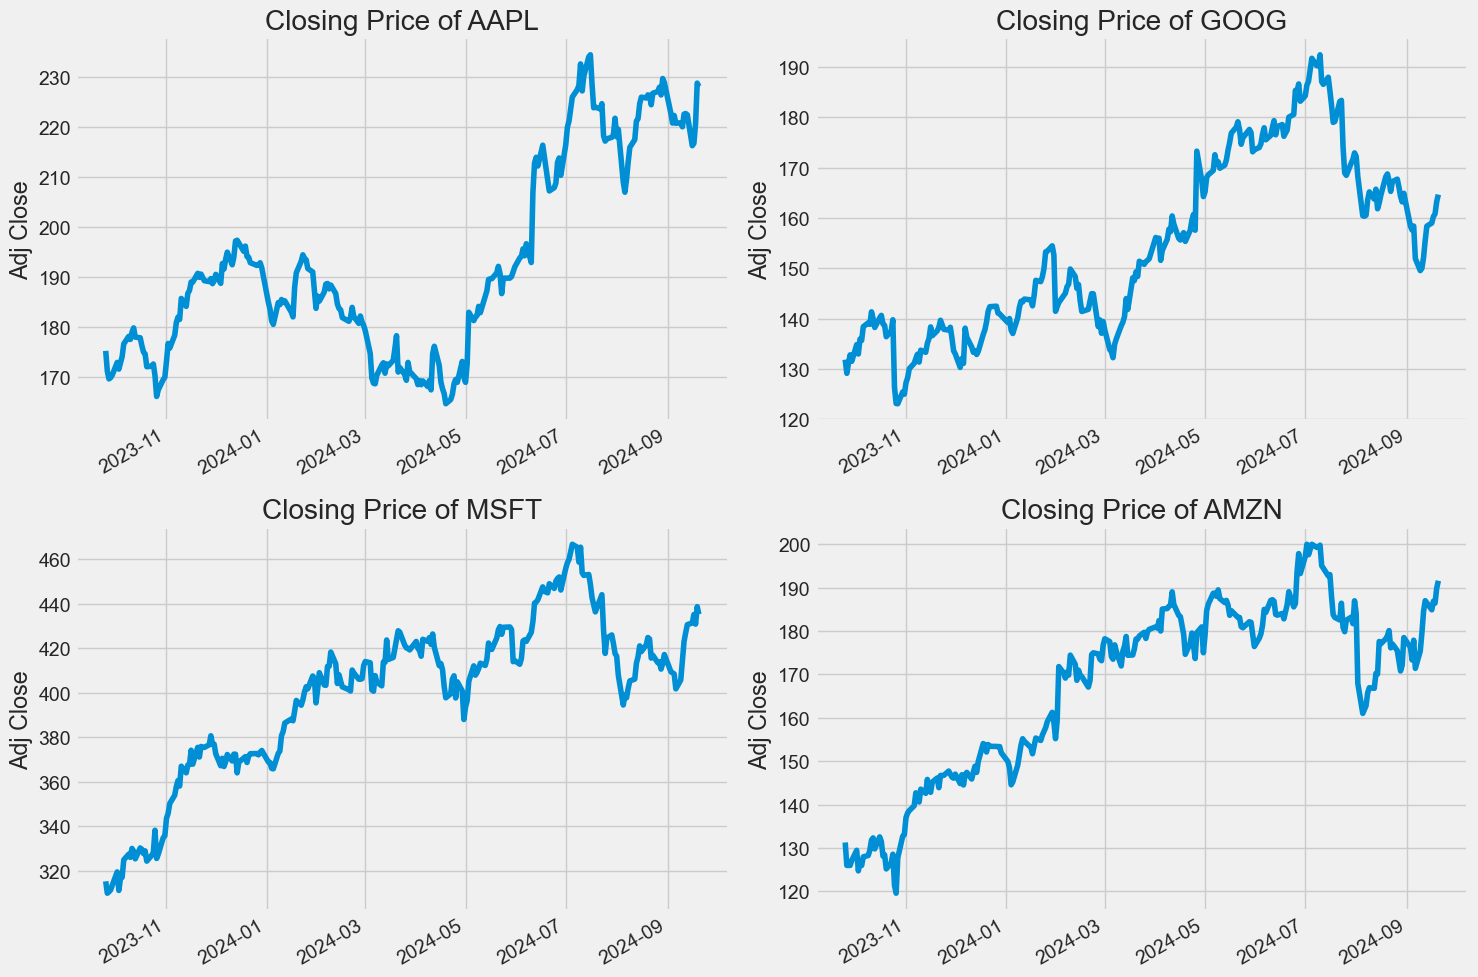

In [10]:
# Let's see a historical view of the closing price
plt.figure(figsize=(15,10))
plt.subplots_adjust(top=1.25,bottom=1.2)
for i,company in enumerate(company_list,1):
    plt.subplot(2,2,i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i-1]}")
plt.tight_layout()

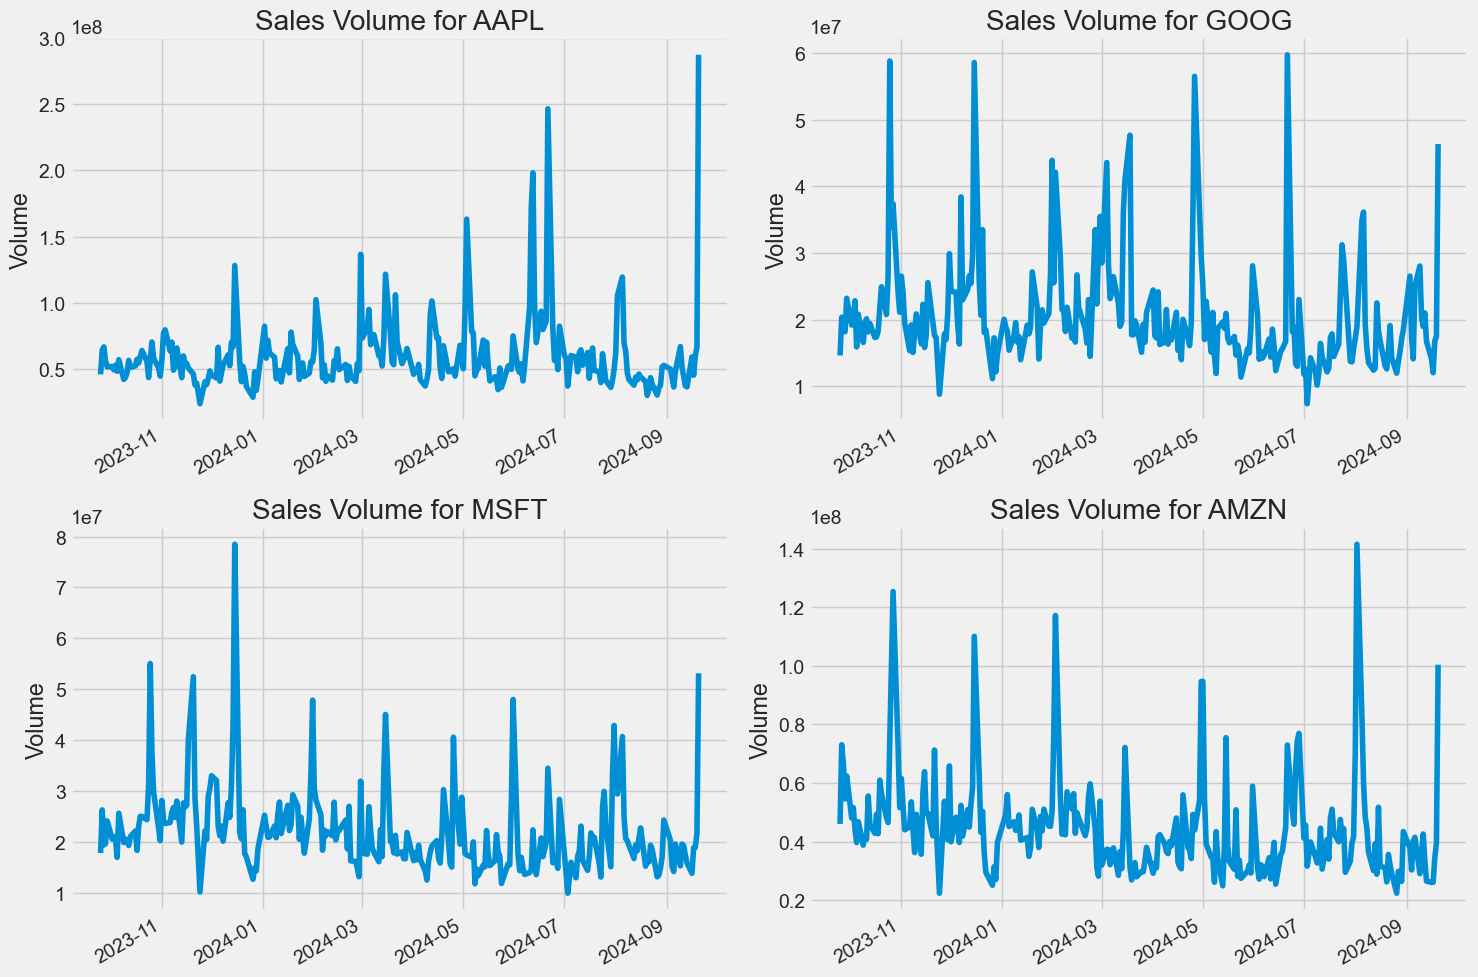

In [12]:
#Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15,10))
plt.subplots_adjust(top=1.25,bottom=1.2)
for i,company in enumerate(company_list,1):
    plt.subplot(2,2,i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i-1]}")
plt.tight_layout()

# 2.What was the moving average of the various stocks.?

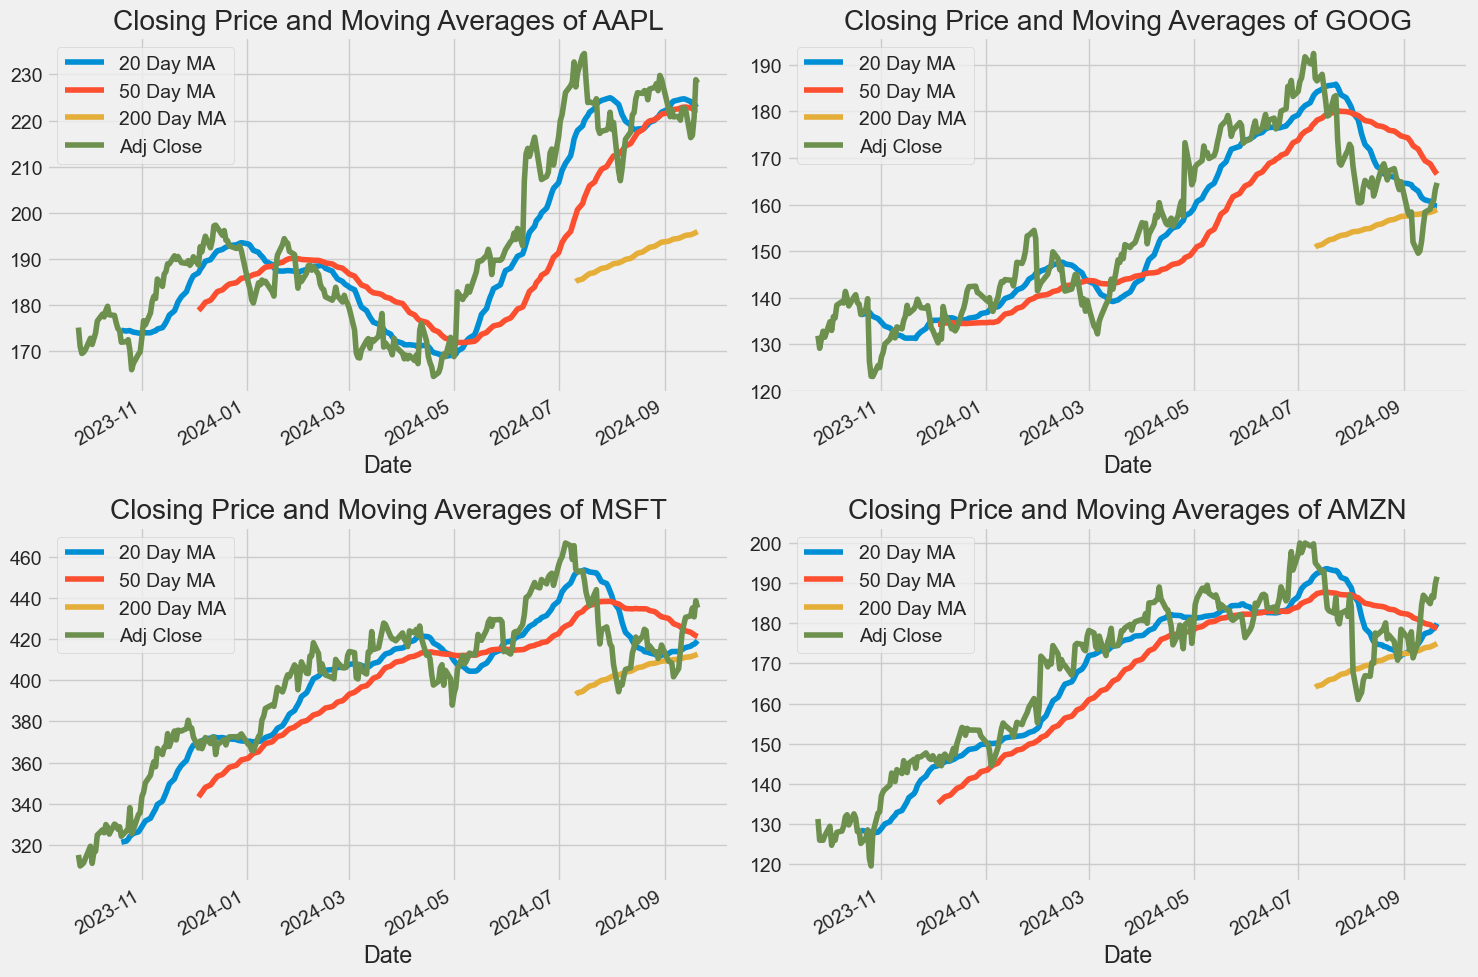

In [14]:
# Define functions to compute RSI and MACD
def compute_rsi(data, window):
    delta = data.diff(1).dropna()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    RS = gain / loss
    RSI = 100 - (100 / (1 + RS))
    return RSI
def compute_macd(data, slow=26, fast=12, smooth=9):
    exp1 = data.ewm(span=fast, adjust=False).mean()
    exp2 = data.ewm(span=slow, adjust=False).mean()
    MACD = exp1 - exp2
    signal = MACD.ewm(span=smooth, adjust=False).mean()
    return MACD, signal
# Additional Stock Indicators
for company in company_list:
    company['20_MA'] = company['Adj Close'].rolling(window=20).mean()
    company['50_MA'] = company['Adj Close'].rolling(window=50).mean()
    company['200_MA'] = company['Adj Close'].rolling(window=200).mean()
    company['RSI'] = compute_rsi(company['Adj Close'], 14)
    company['MACD'], company['Signal_Line'] = compute_macd(company['Adj Close'])
# Plotting additional indicators
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['20_MA'].plot(label='20 Day MA')
    company['50_MA'].plot(label='50 Day MA')
    company['200_MA'].plot(label='200 Day MA')
    company['Adj Close'].plot()
    plt.legend()
    plt.title(f"Closing Price and Moving Averages of {tech_list[i-1]}")

plt.tight_layout()
plt.show()

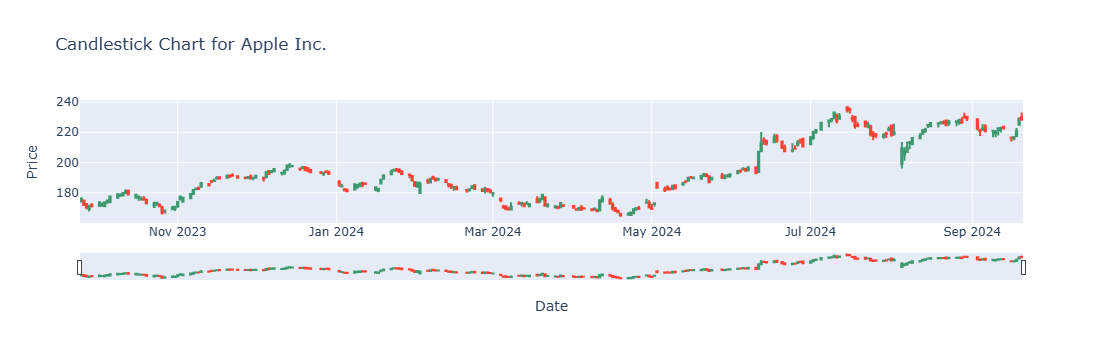

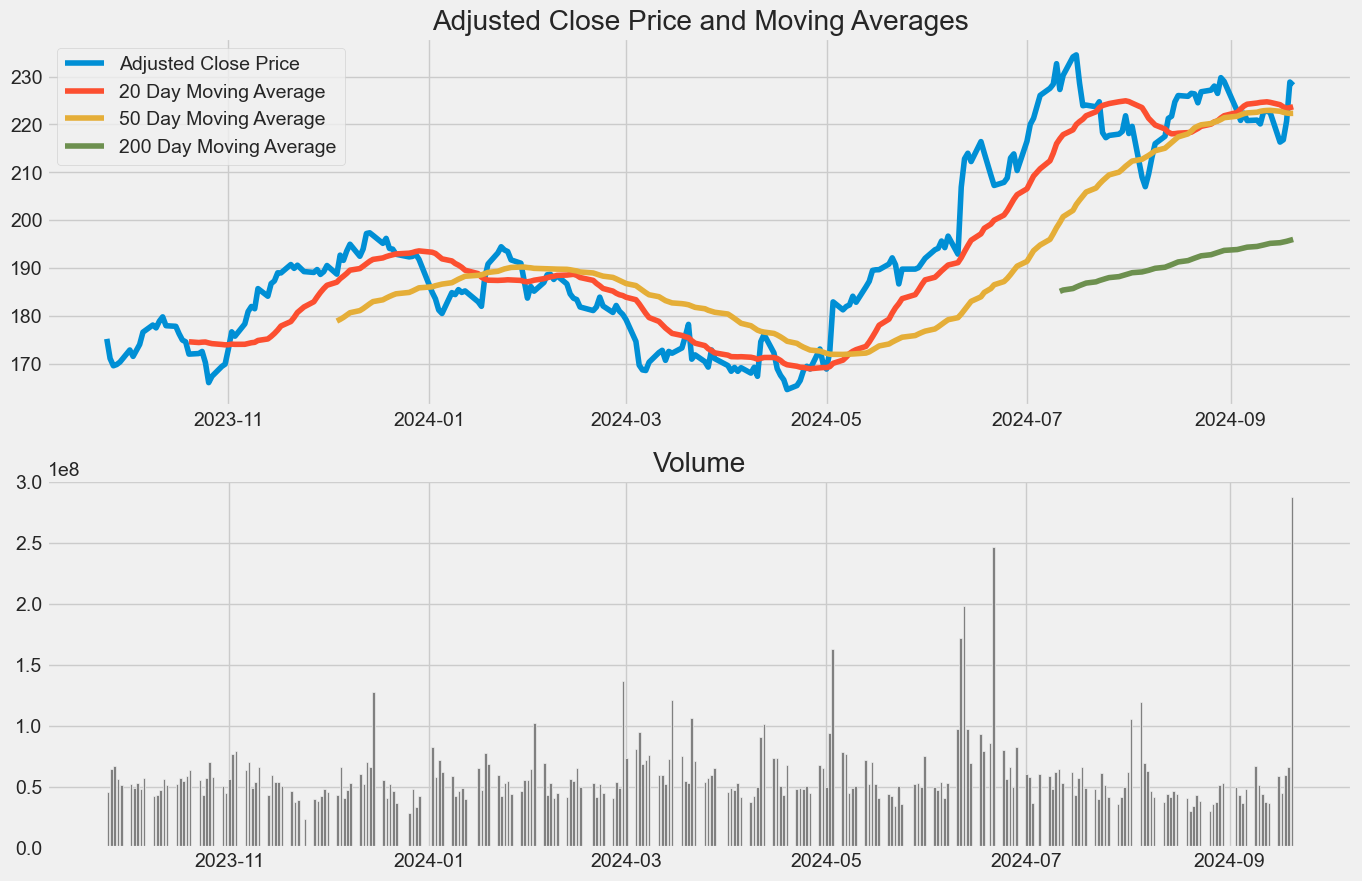

In [16]:
import plotly.graph_objects as go
# Candlestick chart
def plot_candlestick(df, stock_name):
    fig = go.Figure(data=[go.Candlestick(x=df.index,
                                         open=df['Open'],
                                         high=df['High'],
                                         low=df['Low'],
                                         close=df['Close'])])
    fig.update_layout(title=f'Candlestick Chart for {stock_name}',
                      xaxis_title='Date',
                      yaxis_title='Price')
    fig.show()
# Apply candlestick chart to one of the stocks
plot_candlestick(AAPL, 'Apple Inc.')
# Volume and Moving Averages
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
plt.plot(AAPL['Adj Close'], label='Adjusted Close Price')
plt.plot(AAPL['20_MA'], label='20 Day Moving Average')
plt.plot(AAPL['50_MA'], label='50 Day Moving Average')
plt.plot(AAPL['200_MA'], label='200 Day Moving Average')
plt.legend()
plt.title('Adjusted Close Price and Moving Averages')
plt.subplot(2,1,2)
plt.bar(AAPL.index, AAPL['Volume'], color='gray')
plt.title('Volume')
plt.show()

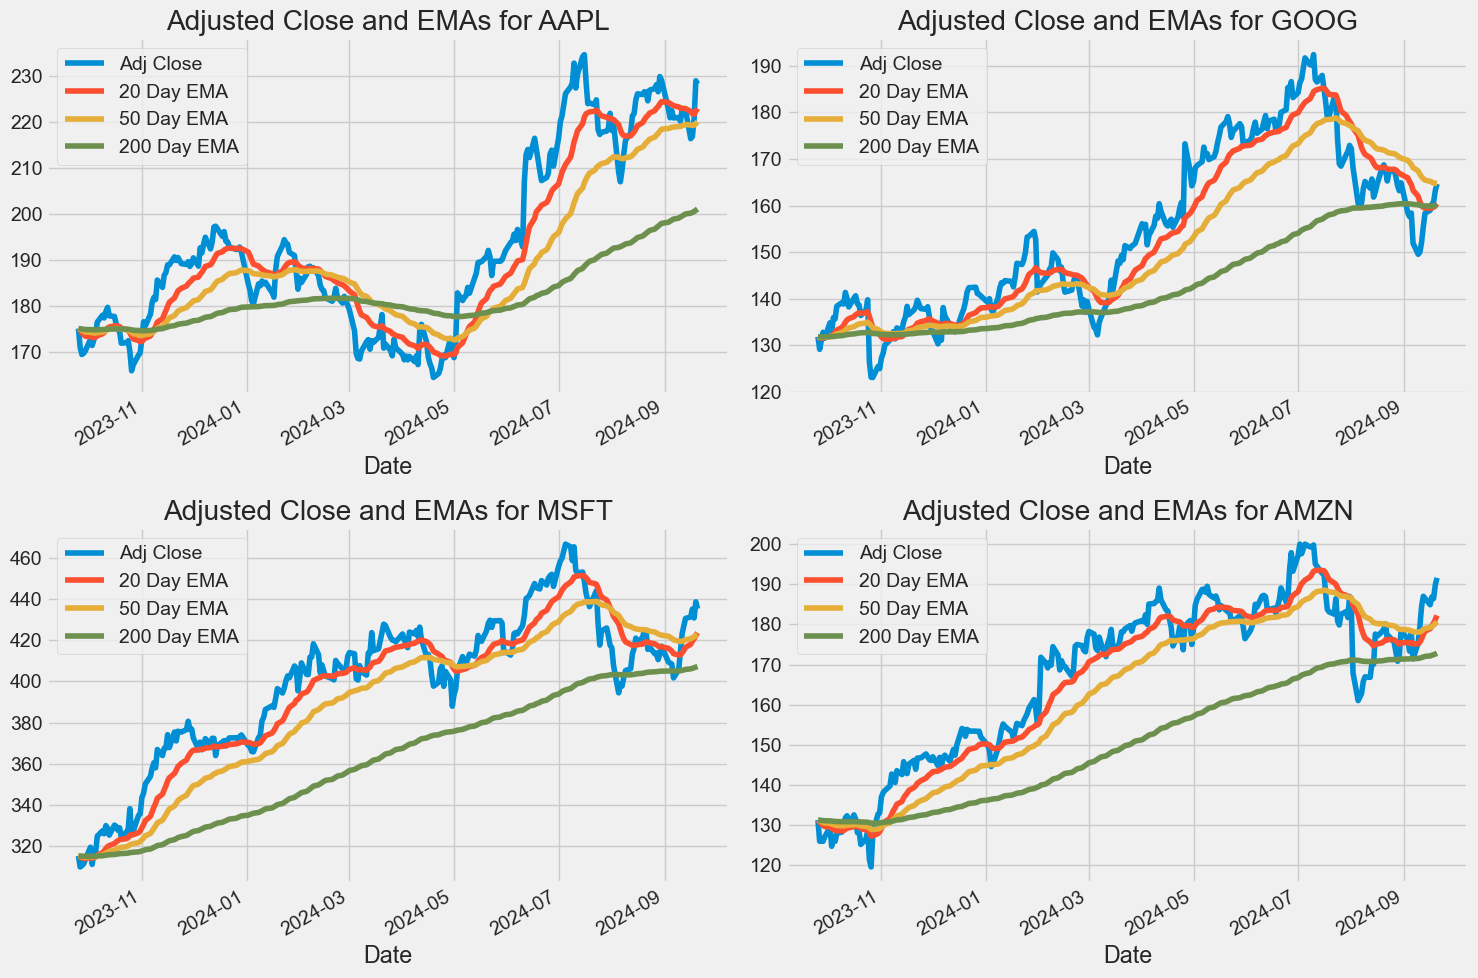

In [18]:
def compute_ema(data, window):
    return data.ewm(span=window, adjust=False).mean()
# Adding EMA to the stock data
for company in company_list:
    company['20_EMA'] = compute_ema(company['Adj Close'], 20)
    company['50_EMA'] = compute_ema(company['Adj Close'], 50)
    company['200_EMA'] = compute_ema(company['Adj Close'], 200)
# Plotting EMA
plt.figure(figsize=(15,10))
for i, company in enumerate(company_list, 1):
    plt.subplot(2,2,i)
    company['Adj Close'].plot(label='Adj Close')
    company['20_EMA'].plot(label='20 Day EMA')
    company['50_EMA'].plot(label='50 Day EMA')
    company['200_EMA'].plot(label='200 Day EMA')
    plt.title(f"Adjusted Close and EMAs for {tech_list[i-1]}")
    plt.legend()
plt.tight_layout()
plt.show()

# 3.What was the daily return of the stock on average.?

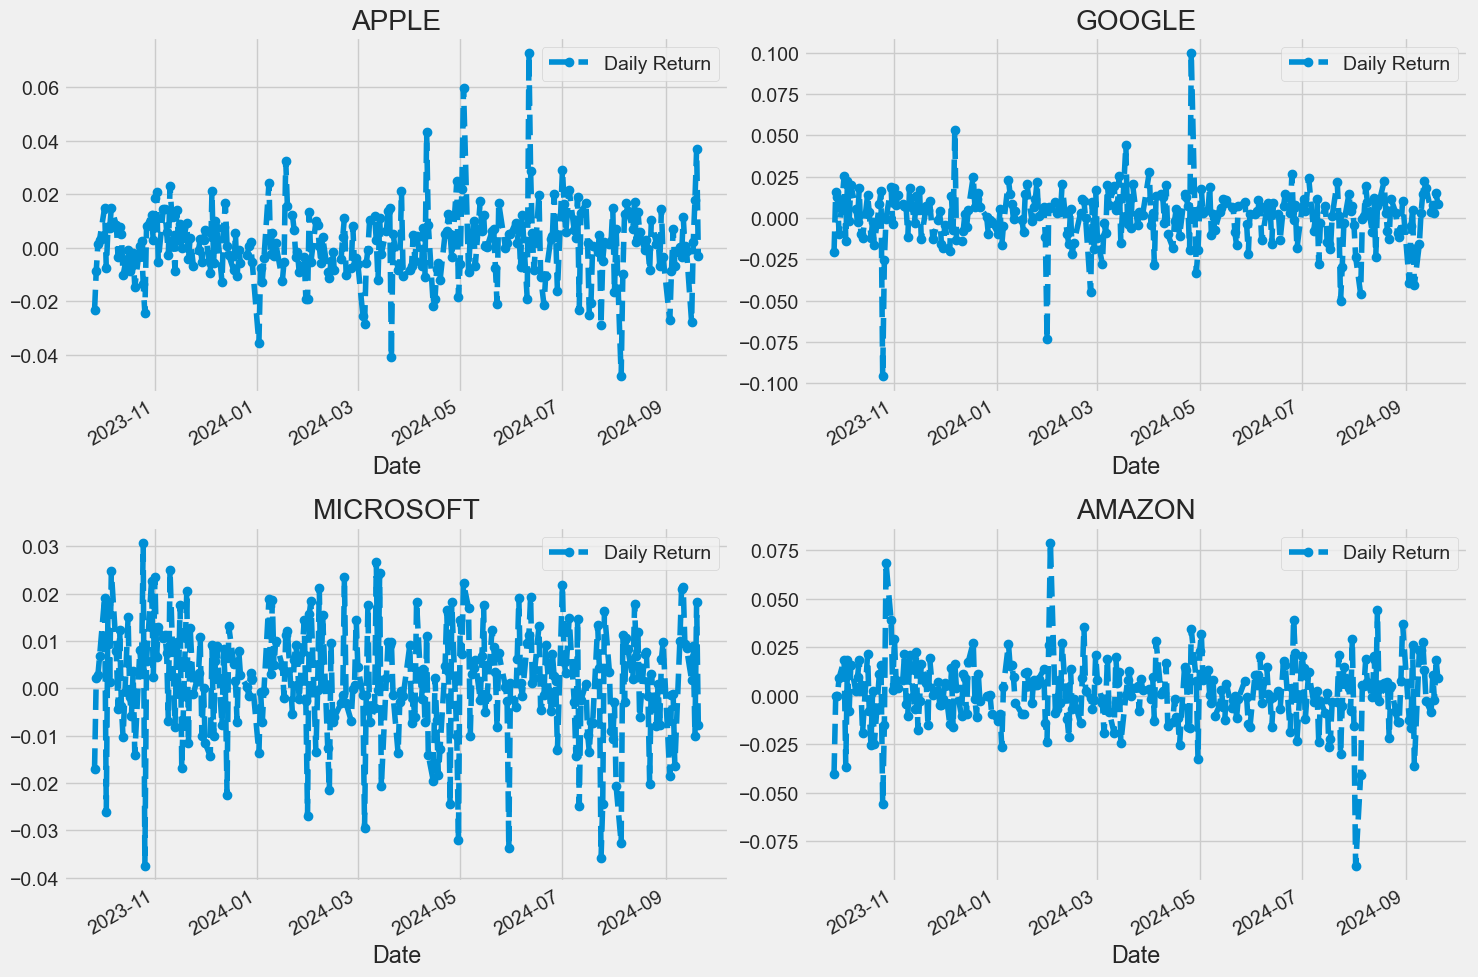

In [20]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return']=company['Adj Close'].pct_change()
fig,axes=plt.subplots(nrows=2,ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0],legend=True,linestyle='--',marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1],legend=True,linestyle='--',marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0],legend=True,linestyle='--',marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1],legend=True,linestyle='--',marker='o')
axes[1,1].set_title('AMAZON')
fig.tight_layout()

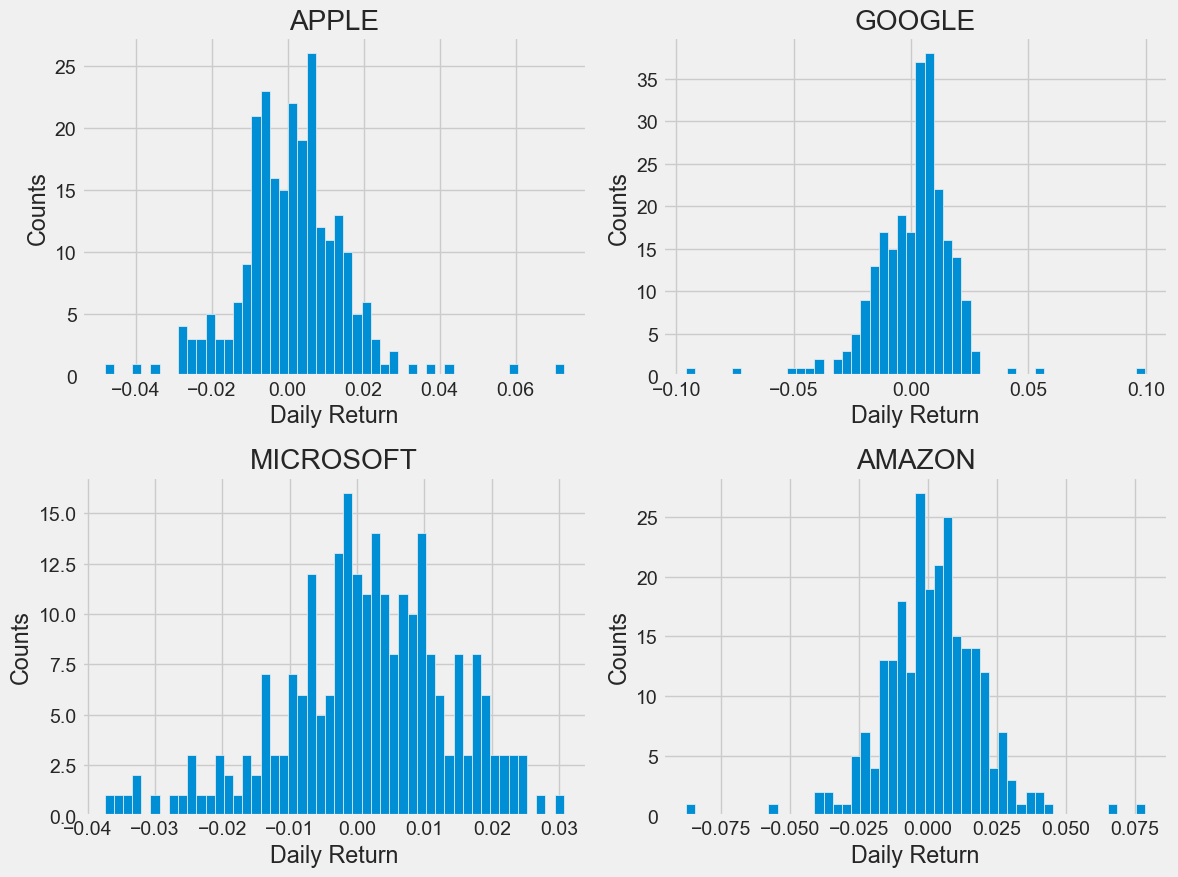

In [22]:
plt.figure(figsize=(12,9))
for i,company in enumerate(company_list,1):
    plt.subplot(2,2,i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i-1]}')
plt.tight_layout()

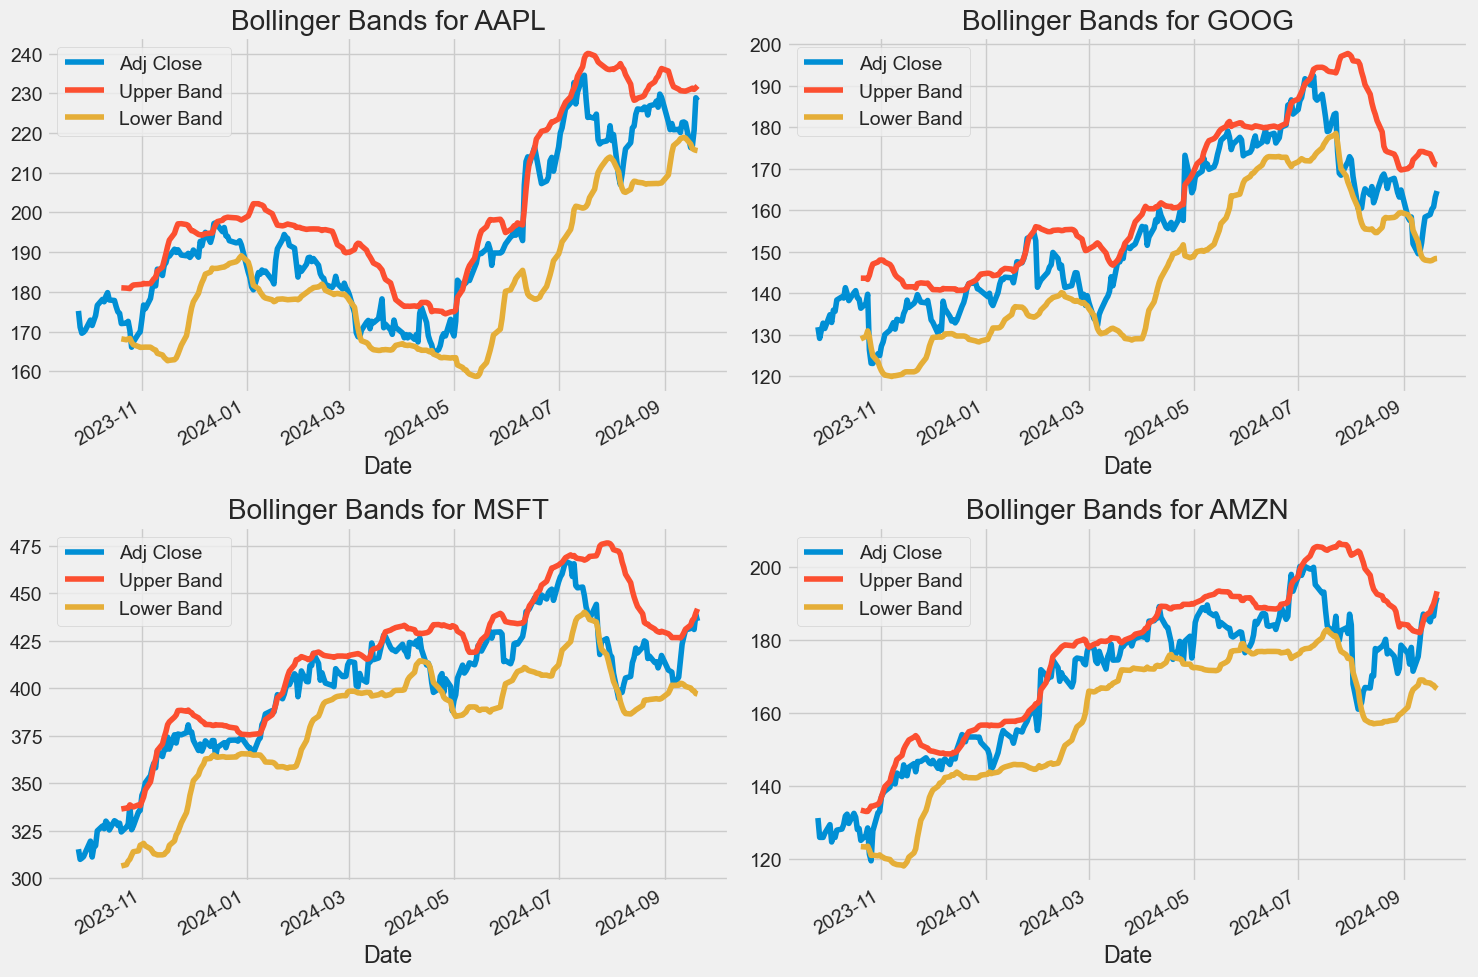

In [24]:
def compute_bollinger_bands(data, window=20):
    rolling_mean = data.rolling(window=window).mean()
    rolling_std = data.rolling(window=window).std()
    upper_band = rolling_mean + (rolling_std * 2)
    lower_band = rolling_mean - (rolling_std * 2)
    return upper_band, lower_band
for company in company_list:
    company['Upper Band'], company['Lower Band'] = compute_bollinger_bands(company['Adj Close'])
# Plotting Bollinger Bands
plt.figure(figsize=(15,10))
for i, company in enumerate(company_list, 1):
    plt.subplot(2,2,i)
    company['Adj Close'].plot(label='Adj Close')
    company['Upper Band'].plot(label='Upper Band')
    company['Lower Band'].plot(label='Lower Band')
    plt.title(f"Bollinger Bands for {tech_list[i-1]}")
    plt.legend()
plt.tight_layout()
plt.show()

# 4.What was the correlation between different stocks closing prices.?

In [26]:
# Fetch data
closing_df = yf.download(tech_list, start=start, end=end)['Adj Close']

# Display the first few rows of the data
print(closing_df.head())

# Calculate percentage returns
tech_rets = closing_df.pct_change()

# Display the first few rows of the returns DataFrame
print(tech_rets.head())

[*********************100%***********************]  4 of 4 completed

Ticker                           AAPL        AMZN        GOOG        MSFT
Date                                                                     
2023-09-25 00:00:00+00:00  175.183578  131.270004  131.846207  315.174316
2023-09-26 00:00:00+00:00  171.084564  125.980003  129.132874  309.814545
2023-09-27 00:00:00+00:00  169.562332  125.980003  131.137955  310.459656
2023-09-28 00:00:00+00:00  169.821014  125.980003  132.803864  311.303375
2023-09-29 00:00:00+00:00  170.338348  127.120003  131.526993  313.397614
Ticker                         AAPL      AMZN      GOOG      MSFT
Date                                                             
2023-09-25 00:00:00+00:00       NaN       NaN       NaN       NaN
2023-09-26 00:00:00+00:00 -0.023398 -0.040299 -0.020580 -0.017006
2023-09-27 00:00:00+00:00 -0.008898  0.000000  0.015527  0.002082
2023-09-28 00:00:00+00:00  0.001526  0.000000  0.012703  0.002718
2023-09-29 00:00:00+00:00  0.003046  0.009049 -0.009615  0.006727


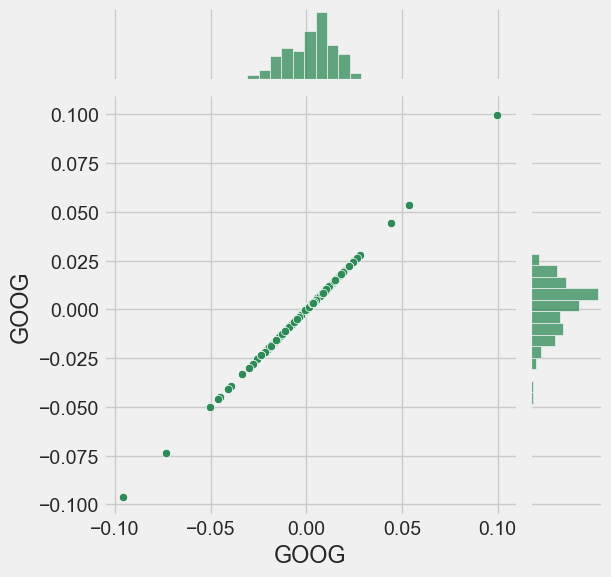

In [28]:
#Comparing Google to itself should show a perfectly linear relationship
sns.jointplot(x='GOOG',y='GOOG',data=tech_rets,kind='scatter',color='seagreen')

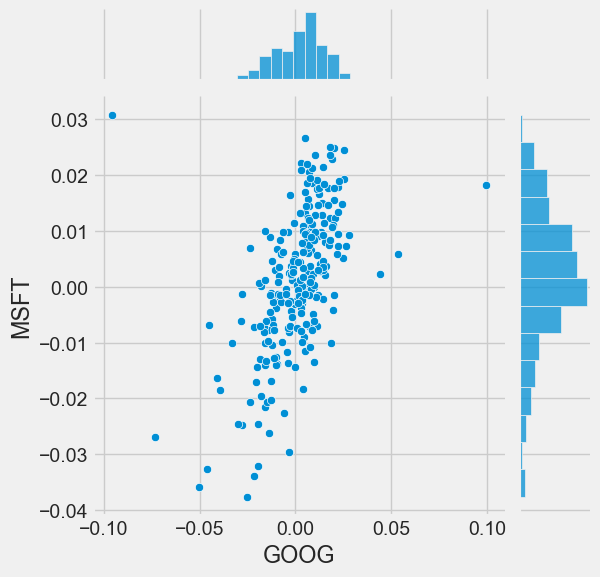

In [30]:
#We'll use jointplot to compare the daily returns of Google and Microsoft
sns.jointplot(x='GOOG',y='MSFT',data=tech_rets,kind='scatter')

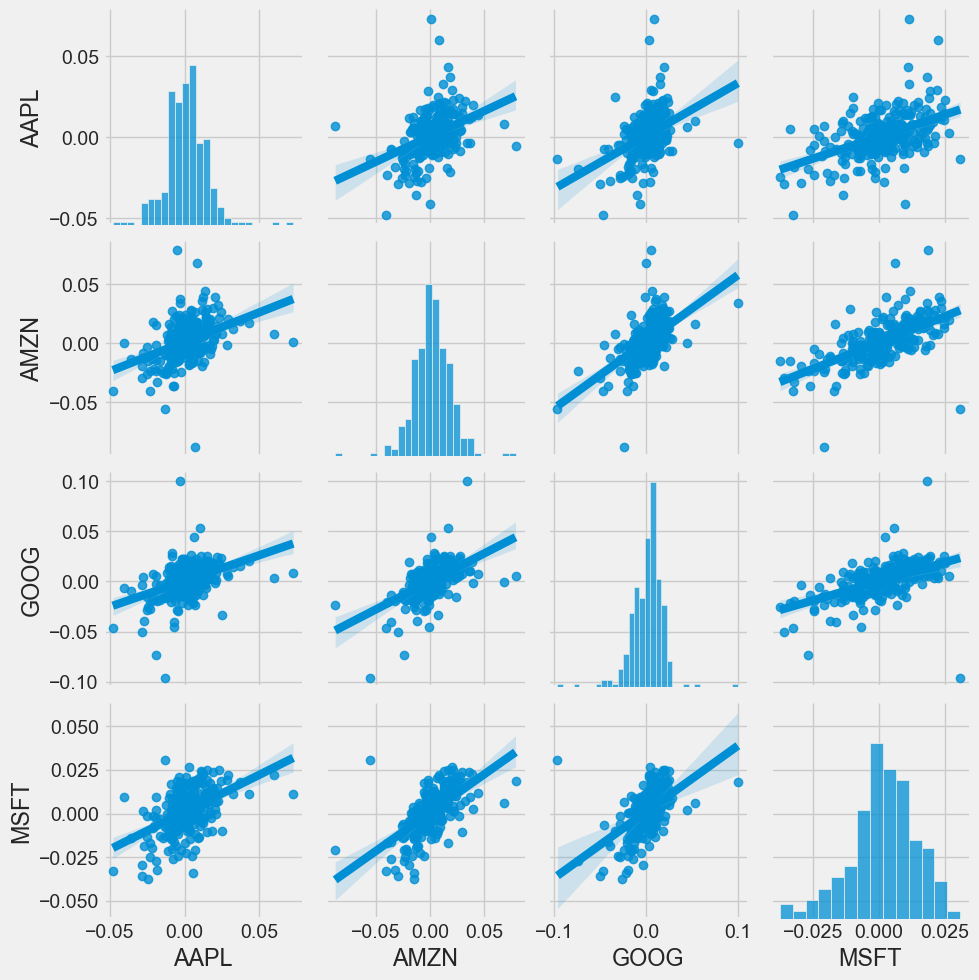

In [32]:
#We can simply call pairplot on our DataFrame for an automatic visual analysis
#of all the comparisons
sns.pairplot(tech_rets,kind='reg')

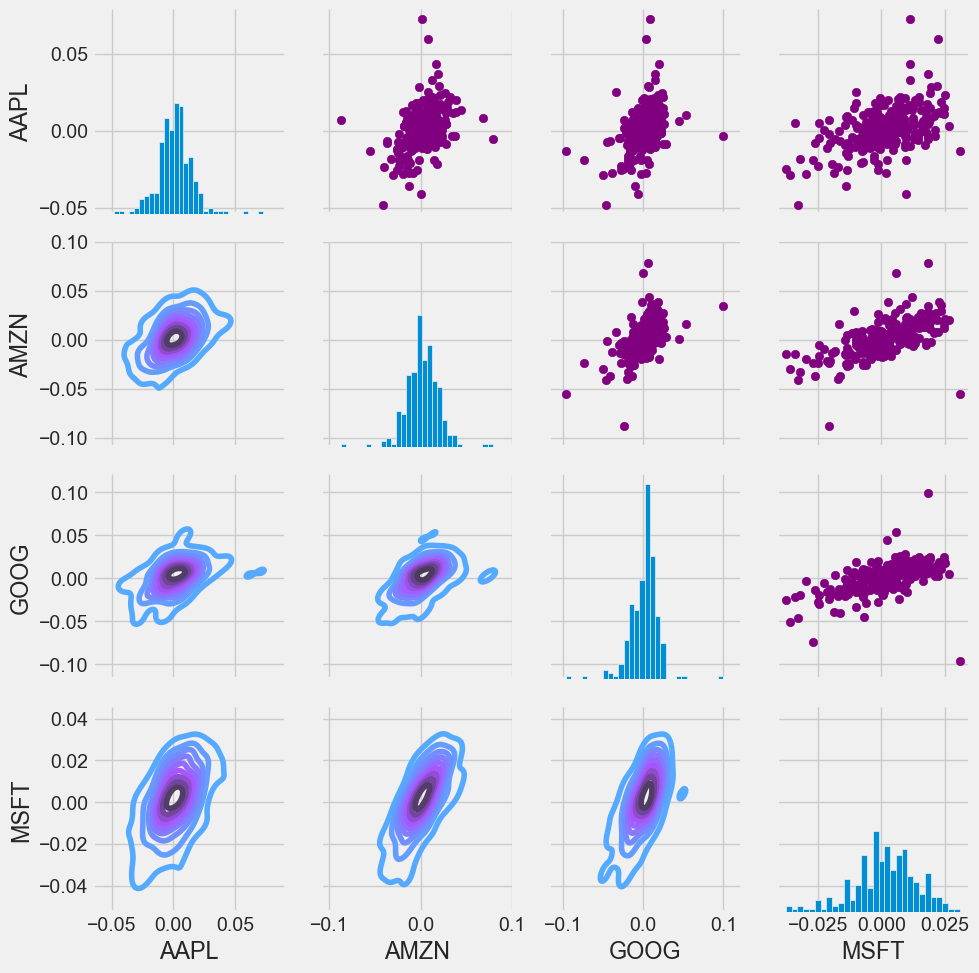

In [36]:
#Set up our figure by naming its returns_fig, call PairPlot on the DataFrame
return_fig=sns.PairGrid(tech_rets.dropna())
#Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter,color='purple')
#We can also define the lower traingle in the figure,including the plot type(kde)
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot,cmap='cool_d')
#Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist,bins=30)

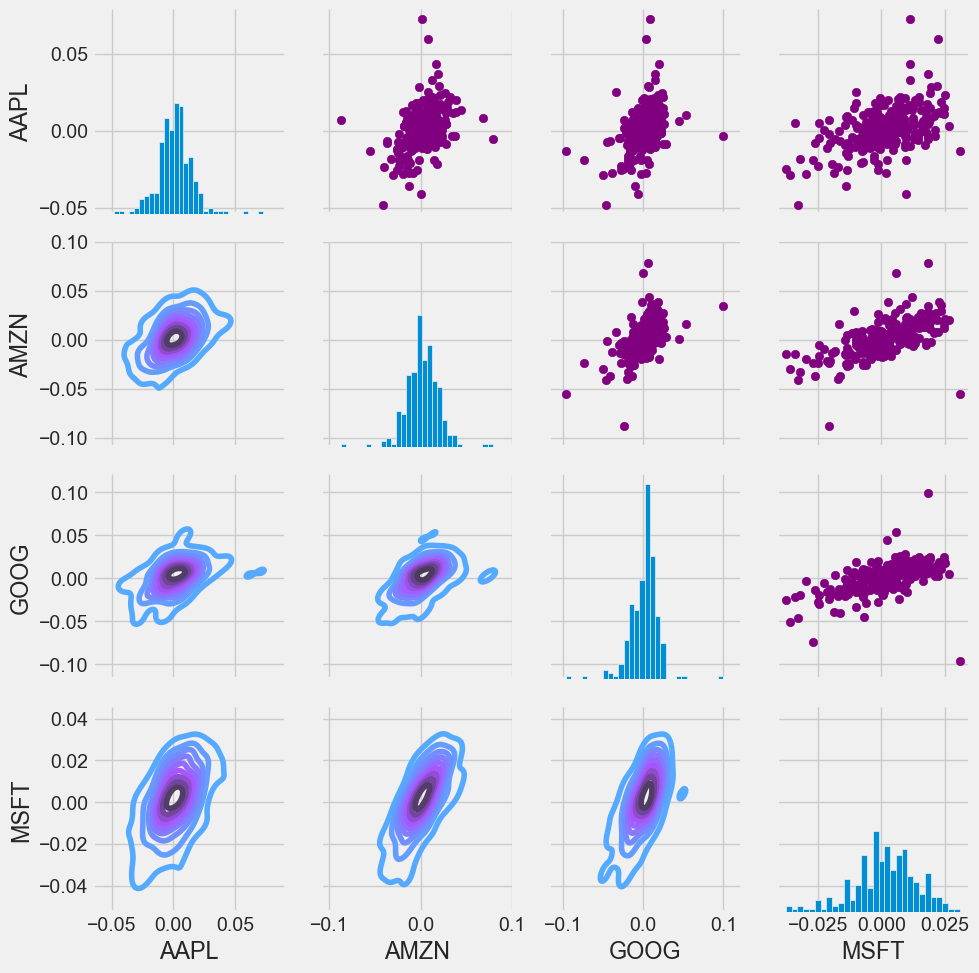

In [37]:
#Set up our figure by naming its returns_fig, call PairPlot on the DataFrame
return_fig=sns.PairGrid(tech_rets.dropna())
#Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter,color='purple')
#We can also define the lower traingle in the figure,including the plot type(kde)
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot,cmap='cool_d')
#Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist,bins=30)

Text(0.5, 1.0, 'Correlation of stock closing price')

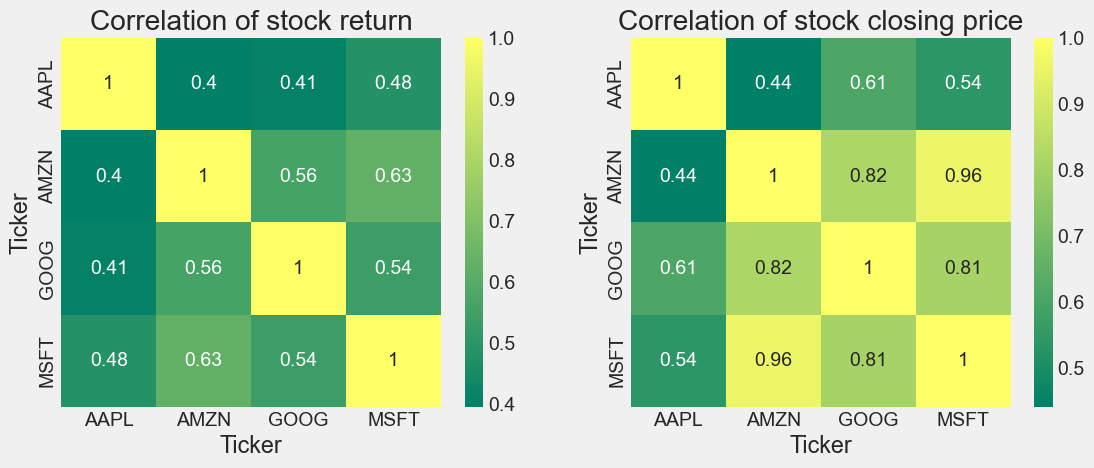

In [38]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.heatmap(tech_rets.corr(),annot=True,cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2,2,2)
sns.heatmap(closing_df.corr(),annot=True,cmap='summer')
plt.title('Correlation of stock closing price')

# 5.How much value do we put at risk by investing in a particular stock.?

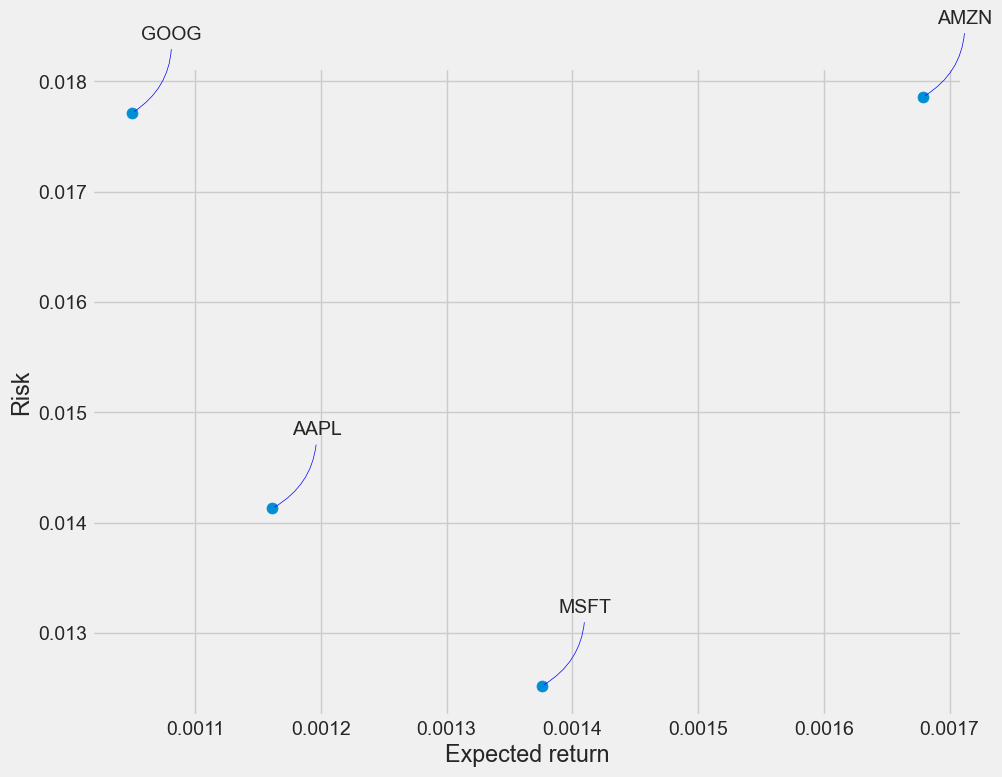

In [42]:
rets=tech_rets.dropna()

area=np.pi*20

plt.figure(figsize=(10,8))
plt.scatter(rets.mean(),rets.std(),s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label,x,y in zip(rets.columns,rets.mean(),rets.std()):
    plt.annotate(label,xy=(x,y),xytext=(50,50),textcoords='offset points',ha='right',va='bottom',arrowprops=dict(arrowstyle='-',color='blue',connectionstyle='arc3,rad=-0.3'))

# 6.Predicting the closing price stock price of APPLE inc using LSTM

In [ ]:
from plotly.subplots import make_subplots
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU, Conv1D, MaxPooling1D
from datetime import datetime, timedelta

# Function to load and preprocess data
def load_data(ticker):
    try:
        print(f"Attempting to download data for ticker: {ticker}")
        df = yf.download(ticker, start="2010-01-01", end=datetime.today().strftime('%Y-%m-%d'))
        
        if df.empty:
            print(f"No data found for {ticker}.")
            return None
        
        print(f"Data successfully loaded for ticker: {ticker}.")
        df = df[['Close']]
        return df
    
    except Exception as e:
        print(f"Error retrieving data for {ticker}: {str(e)}")
        return None

# Function to create dataset
def create_dataset(df, time_step=1):
    dataX, dataY = [], []
    for i in range(len(df)-time_step-1):
        a = df[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(df[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

# Function to build LSTM model
def build_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=input_shape))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dense(25))
    model.add(Dense(1))
    return model

# Function to build GRU model
def build_gru_model(input_shape):
    model = Sequential()
    model.add(GRU(50, return_sequences=True, input_shape=input_shape))
    model.add(GRU(50, return_sequences=False))
    model.add(Dense(25))
    model.add(Dense(1))
    return model

# Function to build ConvLSTM model
def build_convlstm_model(input_shape):
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=3, padding='same', activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=2))
    model.add(LSTM(50, return_sequences=True))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dense(25))
    model.add(Dense(1))
    return model

# Function to predict and plot
def predict_and_plot(ticker, days_to_predict=365):
    df = load_data(ticker)
    if df is None or df.empty:
        return
    
    df = df.dropna()
    
    if len(df) < 2:
        print(f"Not enough data to perform prediction for {ticker}.")
        return

    # Scaling data
    scaler = MinMaxScaler(feature_range=(0,1))
    df_scaled = scaler.fit_transform(np.array(df).reshape(-1,1))
    
    # Splitting data
    training_size = int(len(df_scaled)*0.80)
    if training_size < 1:
        print(f"Not enough data for training. Reduce the time step or use more data for {ticker}.")
        return
    
    test_size = len(df_scaled) - training_size
    train_data, test_data = df_scaled[0:training_size,:], df_scaled[training_size:len(df_scaled),:1]

    time_step = 100
    if len(train_data) <= time_step or len(test_data) <= time_step:
        print(f"Time step too large for the given data. Reduce the time step.")
        return
    
    X_train, y_train = create_dataset(train_data, time_step)
    X_test, y_test = create_dataset(test_data, time_step)
    
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
    
    # Building models
    lstm_model = build_lstm_model((X_train.shape[1], 1))
    gru_model = build_gru_model((X_train.shape[1], 1))
    convlstm_model = build_convlstm_model((X_train.shape[1], 1))
    
    models = {'LSTM': lstm_model, 'GRU': gru_model, 'ConvLSTM': convlstm_model}
    
    # Compiling and training models
    for model_name, model in models.items():
        model.compile(optimizer='adam', loss='mean_squared_error')
        try:
            model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1, batch_size=64, verbose=1)
        except Exception as e:
            print(f"Error training {model_name} model: {str(e)}")
            return
    
    # Predicting and reversing scale
    predictions = {}
    for model_name, model in models.items():
        try:
            train_predict = model.predict(X_train)
            test_predict = model.predict(X_test)
            future_data = list(test_data[-time_step:])
            
            for i in range(days_to_predict):
                pred_input = np.array(future_data[-time_step:]).reshape(1, -1, 1)
                future_pred = model.predict(pred_input)
                future_data.append(future_pred[0])
            
            future_data = np.array(future_data[time_step:])
            future_data = scaler.inverse_transform(future_data)
            predictions[model_name] = (scaler.inverse_transform(train_predict), scaler.inverse_transform(test_predict), future_data)
        
        except Exception as e:
            print(f"Error predicting with {model_name} model: {str(e)}")
            return
    
    # Create individual plots for each model
    for model_name, (train_predict, test_predict, future_predict) in predictions.items():
        fig = make_subplots(rows=1, cols=2, subplot_titles=(f'{model_name} Train and Test Predictions', f'{model_name} Future Predictions'))
        
        trace_train = go.Scatter(
            x=df.index[time_step:len(train_predict)+time_step],
            y=train_predict.flatten(),
            mode='lines',
            name=f'{model_name} Train Predictions'
        )
        trace_test = go.Scatter(
            x=df.index[len(train_predict)+(time_step*2)+1:len(df)-1],
            y=test_predict.flatten(),
            mode='lines',
            name=f'{model_name} Test Predictions'
        )
        trace_future = go.Scatter(
            x=[df.index[-1] + timedelta(days=i) for i in range(1, days_to_predict + 1)],
            y=future_predict.flatten(),
            mode='lines',
            name=f'{model_name} Future Predictions'
        )
        trace_original = go.Scatter(
            x=df.index,
            y=df['Close'],
            mode='lines',
            name='Original Data'
        )
        
        # Plot Train and Test predictions
        fig.add_trace(trace_train, row=1, col=1)
        fig.add_trace(trace_test, row=1, col=1)
        fig.add_trace(trace_original, row=1, col=1)
        
        # Plot Future predictions
        fig.add_trace(trace_future, row=1, col=2)
        fig.add_trace(trace_original, row=1, col=2)
        
        fig.update_layout(title=f'{model_name} - Stock Price Predictions for {ticker}')
        fig.show()
    
    # Combine all predictions into one final plot
    fig_combined = make_subplots(rows=1, cols=1, subplot_titles=('Combined Predictions'))
    trace_original = go.Scatter(
        x=df.index,
        y=df['Close'],
        mode='lines',
        name='Original Data'
    )
    fig_combined.add_trace(trace_original)

    for model_name, (_, _, future_predict) in predictions.items():
        trace_future = go.Scatter(
            x=[df.index[-1] + timedelta(days=i) for i in range(1, days_to_predict + 1)],
            y=future_predict.flatten(),
            mode='lines',
            name=f'{model_name} Future Predictions'
        )
        fig_combined.add_trace(trace_future)
    
    fig_combined.update_layout(title=f'Combined Stock Price Predictions for {ticker}')
    fig_combined.show()

# Example usage
ticker = input("Enter Stock Ticker: ").strip().upper()  # Ensure ticker is uppercase and has no extra spaces
predict_and_plot(ticker)
